In [239]:
pip install yfinance

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [241]:
import yfinance as yf
saham = ['BBCA.JK','BBRI.JK','TLKM.JK','UNVR.JK','ICBP.JK']
saham.sort()
data = yf.download(saham, start='2017-01-01', end='2017-12-31',progress=False, interval='1wk')['Close']
data.head()

,BBCA.JK,BBRI.JK,ICBP.JK,TLKM.JK,UNVR.JK
Date,,,,,
2017-01-01,15600.0,2420.0,8525.0,4000.0,8120.0
2017-01-08,15275.0,2390.0,8525.0,3950.0,7920.0
2017-01-15,15250.0,2360.0,8500.0,3830.0,8100.0
2017-01-22,15400.0,2345.0,8550.0,3890.0,8340.0
2017-01-29,15475.0,2400.0,8450.0,3950.0,8400.0


In [242]:
#Nge-return data saham mingguan
return_mingguan = data.pct_change()
return_mingguan.head()

,BBCA.JK,BBRI.JK,ICBP.JK,TLKM.JK,UNVR.JK
Date,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-08,-0.020833,-0.012397,0.000000,-0.012500,-0.024631
2017-01-15,-0.001637,-0.012552,-0.002933,-0.030380,0.022727
2017-01-22,0.009836,-0.006356,0.005882,0.015666,0.029630
2017-01-29,0.004870,0.023454,-0.011696,0.015424,0.007194


In [243]:
#Nge-return rata-rata mingguan
return_rata = return_mingguan.mean()
return_rata.head()

BBCA.JK    0.005813
BBRI.JK    0.007102
ICBP.JK    0.001005
TLKM.JK    0.001956
UNVR.JK    0.005498
dtype: float64

In [244]:
print(str(round(return_rata * 100,2)) + '%')

BBCA.JK    0.58
BBRI.JK    0.71
ICBP.JK    0.10
TLKM.JK    0.20
UNVR.JK    0.55
dtype: float64%


In [245]:
#Covariansi
df = return_mingguan.cov()
df.head()

,BBCA.JK,BBRI.JK,ICBP.JK,TLKM.JK,UNVR.JK
BBCA.JK,0.000295,0.000122,0.000110,0.000090,0.000075
BBRI.JK,0.000122,0.000572,0.000191,0.000157,0.000150
ICBP.JK,0.000110,0.000191,0.000591,0.000109,0.000169
TLKM.JK,0.000090,0.000157,0.000109,0.000442,0.000149
UNVR.JK,0.000075,0.000150,0.000169,0.000149,0.000317


In [246]:
#Portofolio Minim Resiko
from numpy.linalg import inv
u = np.array([1,1,1,1,1])
uT = np.transpose(u)
Cinverse = inv(df)
wopt1 = np.dot(u,Cinverse)/(u.dot(Cinverse).dot(uT))
print("Hasil Minim Resiko adalah :")
print("w1 =",wopt[0])
print("w2 =",wopt[1])
print("w3 =",wopt[2])
print("w4 =",wopt[3])
print("w5 =",wopt[4])

Hasil Minim Resiko adalah :
w1 = 0.3310507846125349
w2 = 0.10643994109418714
w3 = 0.26416639508446677
w4 = 0.047600323999723616
w5 = 0.2507425552090875


In [247]:
#Menghitung nilai harapan return dan nilai Resiko
wopt1 = np.transpose(wopt1)
resiko1 = wopt1.dot(df).dot(wopt1)
Ek1 = np.dot(return_rata,wopt1)
print("Nilai Harapan 1 (Ek) =",Ek1)
print("Nilai Resiko 1 =",resiko1)

Nilai Harapan 1 (Ek) = 0.004792601799946123
Nilai Resiko 1 = 0.00017057034837002045


In [0]:
#Portofolio return 1 
en = 1
Et = np.transpose(return_rata)

matA = np.dot(u,Cinverse)
matB = np.dot(return_rata,(Cinverse))
mat1 = u.dot(Cinverse).dot(Et)
mat2 = return_rata.dot(Cinverse).dot(Et)
mat3 = u.dot(Cinverse).dot(uT)
mat4 = return_rata.dot(Cinverse).dot(uT)

A1 = np.array([[1,mat1],[en,mat2]])
A2 = np.array([[mat3,1],[mat4,en]])
A3 = np.array([[mat3,mat1],[mat4,mat2]])

In [0]:
from numpy.linalg import det
det1 = det([[1,mat1],[en,mat2]])
det2 = det([[mat3,1],[mat4,en]])
det3 = det([[mat3,mat1],[mat4,mat2]])

wopt2 = ((det1*matA)+(det2*matB))/det3

In [250]:
wopt2 = np.transpose(wopt2)
resiko2 = wopt2.dot(df).dot(wopt2)
Ek2 = np.dot(return_rata,wopt2)
print("Nilai Harapan 2 (Ek) =",Ek2)
print("Nilai Resiko 2 =",resiko2)

Nilai Harapan 2 (Ek) = 0.9999999999999964
Nilai Resiko 2 = 10.533296343666493


In [0]:
#Portofolio return 1.5 
en = 1.5
Et = np.transpose(return_rata)

matA = np.dot(u,Cinverse)
matB = np.dot(return_rata,(Cinverse))
mat1 = u.dot(Cinverse).dot(Et)
mat2 = return_rata.dot(Cinverse).dot(Et)
mat3 = u.dot(Cinverse).dot(uT)
mat4 = return_rata.dot(Cinverse).dot(uT)

A1 = np.array([[1,mat1],[en,mat2]])
A2 = np.array([[mat3,1],[mat4,en]])
A3 = np.array([[mat3,mat1],[mat4,mat2]])

det1 = det([[1,mat1],[en,mat2]])
det2 = det([[mat3,1],[mat4,en]])
det3 = det([[mat3,mat1],[mat4,mat2]])

wopt3 = ((det1*matA)+(det2*matB))/det3

In [252]:
wopt3 = np.transpose(wopt3)
resiko3 = wopt3.dot(df).dot(wopt3)
Ek3 = np.dot(return_rata,wopt3)
print("Nilai Harapan 3 (Ek) =",Ek3)
print("Nilai Resiko 3 =",resiko3)

Nilai Harapan 3 (Ek) = 1.4999999999999996
Nilai Resiko 3 = 23.775850895678218


In [0]:
#Portofolio return 2 
en = 2
Et = np.transpose(return_rata)

matA = np.dot(u,Cinverse)
matB = np.dot(return_rata,(Cinverse))
mat1 = u.dot(Cinverse).dot(Et)
mat2 = return_rata.dot(Cinverse).dot(Et)
mat3 = u.dot(Cinverse).dot(uT)
mat4 = return_rata.dot(Cinverse).dot(uT)

A1 = np.array([[1,mat1],[en,mat2]])
A2 = np.array([[mat3,1],[mat4,en]])
A3 = np.array([[mat3,mat1],[mat4,mat2]])

det1 = det([[1,mat1],[en,mat2]])
det2 = det([[mat3,1],[mat4,en]])
det3 = det([[mat3,mat1],[mat4,mat2]])

wopt4 = ((det1*matA)+(det2*matB))/det3

In [254]:
wopt4 = np.transpose(wopt4)
resiko4 = wopt4.dot(df).dot(wopt4)
Ek4 = np.dot(return_rata,wopt4)
print("Nilai Harapan 4 (Ek) =",Ek4)
print("Nilai Resiko 4 =",resiko4)

Nilai Harapan 4 (Ek) = 1.9999999999999947
Nilai Resiko 4 = 42.33581464841968


In [0]:
#Portofolio return 2.5 
en = 2.5
Et = np.transpose(return_rata)

matA = np.dot(u,Cinverse)
matB = np.dot(return_rata,(Cinverse))
mat1 = u.dot(Cinverse).dot(Et)
mat2 = return_rata.dot(Cinverse).dot(Et)
mat3 = u.dot(Cinverse).dot(uT)
mat4 = return_rata.dot(Cinverse).dot(uT)

A1 = np.array([[1,mat1],[en,mat2]])
A2 = np.array([[mat3,1],[mat4,en]])
A3 = np.array([[mat3,mat1],[mat4,mat2]])

det1 = det([[1,mat1],[en,mat2]])
det2 = det([[mat3,1],[mat4,en]])
det3 = det([[mat3,mat1],[mat4,mat2]])

wopt5 = ((det1*matA)+(det2*matB))/det3

In [256]:
wopt5 = np.transpose(wopt5)
resiko5 = wopt5.dot(df).dot(wopt5)
Ek5 = np.dot(return_rata,wopt5)
print("Nilai Harapan 5 (Ek) =",Ek5)
print("Nilai Resiko 5 =",resiko5)

Nilai Harapan 5 (Ek) = 2.499999999999994
Nilai Resiko 5 = 66.21318760189105


Text(0, 0.5, 'Resiko')

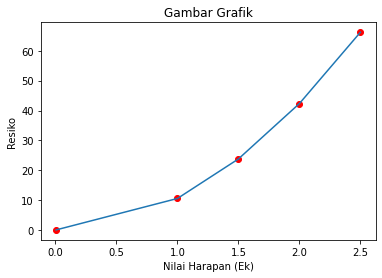

In [257]:
#Memvisualisasikan Total nilai Harapan dan Nilai Resiko
x = np.array([Ek1,Ek2,Ek3,Ek4,Ek5])
y = np.array([resiko1,resiko2,resiko3,resiko4,resiko5])
plt.plot(x,y)
plt.scatter(x, y, c='red');
plt.title("Gambar Grafik")
plt.xlabel("Nilai Harapan (Ek)")
plt.ylabel("Resiko")

PENGUJIAN (Data2019)

In [258]:
saham = ['BBCA.JK','BBRI.JK','TLKM.JK','JPFA.JK','ICBP.JK']
saham.sort()
data = yf.download(saham, start='2019-01-01', end='2019-12-31',progress=False, interval='1wk')['Close']
data.head()

,BBCA.JK,BBRI.JK,ICBP.JK,JPFA.JK,TLKM.JK
Date,,,,,
2019-01-01,26225.0,3660.0,10350.0,2250.0,3770.0
2019-01-08,26000.0,3790.0,10000.0,2160.0,3850.0
2019-01-15,27725.0,3800.0,10200.0,2230.0,4030.0
2019-01-22,27475.0,3780.0,10750.0,2850.0,3780.0
2019-01-29,27500.0,3900.0,10650.0,3020.0,3780.0


In [259]:
#Nge-return data saham mingguan
return_mingguan = data.pct_change()
return_mingguan.head()

,BBCA.JK,BBRI.JK,ICBP.JK,JPFA.JK,TLKM.JK
Date,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-08,-0.008580,0.035519,-0.033816,-0.040000,0.021220
2019-01-15,0.066346,0.002639,0.020000,0.032407,0.046753
2019-01-22,-0.009017,-0.005263,0.053922,0.278027,-0.062035
2019-01-29,0.000910,0.031746,-0.009302,0.059649,0.000000


In [260]:
#Nge-return rata-rata mingguan
return_rata = return_mingguan.mean()
return_rata.head()

BBCA.JK    0.004276
BBRI.JK    0.003474
ICBP.JK    0.001539
JPFA.JK   -0.004493
TLKM.JK    0.001180
dtype: float64

In [261]:
print(str(round(return_rata * 100,2)) + '%')

BBCA.JK    0.43
BBRI.JK    0.35
ICBP.JK    0.15
JPFA.JK   -0.45
TLKM.JK    0.12
dtype: float64%


In [262]:
#Covariansi
df = return_mingguan.cov()
df.head()

,BBCA.JK,BBRI.JK,ICBP.JK,JPFA.JK,TLKM.JK
BBCA.JK,0.000323,0.000217,0.000107,0.000169,0.000231
BBRI.JK,0.000217,0.000702,-0.000045,0.000246,0.000304
ICBP.JK,0.000107,-0.000045,0.000554,0.000379,0.000037
JPFA.JK,0.000169,0.000246,0.000379,0.004135,-0.000044
TLKM.JK,0.000231,0.000304,0.000037,-0.000044,0.000620


In [263]:
#Portofolio Minim Resiko
u = np.array([1,1,1,1,1])
uT = np.transpose(u)
Cinverse = inv(df)
wopt1 = np.dot(u,Cinverse)/(u.dot(Cinverse).dot(uT))
print("Hasil Minim Resiko adalah :")
print("w1 =",wopt[0])
print("w2 =",wopt[1])
print("w3 =",wopt[2])
print("w4 =",wopt[3])
print("w5 =",wopt[4])

Hasil Minim Resiko adalah :
w1 = 0.3310507846125349
w2 = 0.10643994109418714
w3 = 0.26416639508446677
w4 = 0.047600323999723616
w5 = 0.2507425552090875


In [264]:
#Menghitung nilai harapan return dan nilai Resiko
wopt1 = np.transpose(wopt1)
resiko1 = wopt1.dot(df).dot(wopt1)
Ek1 = np.dot(return_rata,wopt1)
print("Nilai Harapan Uji 1 (Ek) =",Ek1)
print("Nilai Resiko Uji 1 =",resiko1)

Nilai Harapan Uji 1 (Ek) = 0.0028923655919574935
Nilai Resiko Uji 1 = 0.00022219175798677589


In [0]:
#Portofolio return 1 (Uji)
en = 1
Et = np.transpose(return_rata)

matA = np.dot(u,Cinverse)
matB = np.dot(return_rata,(Cinverse))
mat1 = u.dot(Cinverse).dot(Et)
mat2 = return_rata.dot(Cinverse).dot(Et)
mat3 = u.dot(Cinverse).dot(uT)
mat4 = return_rata.dot(Cinverse).dot(uT)

A1 = np.array([[1,mat1],[en,mat2]])
A2 = np.array([[mat3,1],[mat4,en]])
A3 = np.array([[mat3,mat1],[mat4,mat2]])

In [0]:
det1 = det([[1,mat1],[en,mat2]])
det2 = det([[mat3,1],[mat4,en]])
det3 = det([[mat3,mat1],[mat4,mat2]])

wopt2 = ((det1*matA)+(det2*matB))/det3

In [267]:
wopt2 = np.transpose(wopt2)
resiko2 = wopt2.dot(df).dot(wopt2)
Ek2 = np.dot(return_rata,wopt2)
print("Nilai Harapan Uji 2 (Ek) =",Ek2)
print("Nilai Resiko Uji 2 =",resiko2)

Nilai Harapan Uji 2 (Ek) = 1.000000000000001
Nilai Resiko Uji 2 = 21.059295423726606


In [0]:
#Portofolio return 1.5 (Uji)
en = 1.5
Et = np.transpose(return_rata)

matA = np.dot(u,Cinverse)
matB = np.dot(return_rata,(Cinverse))
mat1 = u.dot(Cinverse).dot(Et)
mat2 = return_rata.dot(Cinverse).dot(Et)
mat3 = u.dot(Cinverse).dot(uT)
mat4 = return_rata.dot(Cinverse).dot(uT)

A1 = np.array([[1,mat1],[en,mat2]])
A2 = np.array([[mat3,1],[mat4,en]])
A3 = np.array([[mat3,mat1],[mat4,mat2]])

det1 = det([[1,mat1],[en,mat2]])
det2 = det([[mat3,1],[mat4,en]])
det3 = det([[mat3,mat1],[mat4,mat2]])

wopt3 = ((det1*matA)+(det2*matB))/det3

In [269]:
wopt3 = np.transpose(wopt3)
resiko3 = wopt3.dot(df).dot(wopt3)
Ek3 = np.dot(return_rata,wopt3)
print("Nilai Harapan Uji 3 (Ek) =",Ek3)
print("Nilai Resiko Uji 3 =",resiko3)

Nilai Harapan Uji 3 (Ek) = 1.4999999999999991
Nilai Resiko Uji 3 = 47.47481210157096


In [0]:
#Portofolio return 2 (Uji)
en = 2
Et = np.transpose(return_rata)

matA = np.dot(u,Cinverse)
matB = np.dot(return_rata,(Cinverse))
mat1 = u.dot(Cinverse).dot(Et)
mat2 = return_rata.dot(Cinverse).dot(Et)
mat3 = u.dot(Cinverse).dot(uT)
mat4 = return_rata.dot(Cinverse).dot(uT)

A1 = np.array([[1,mat1],[en,mat2]])
A2 = np.array([[mat3,1],[mat4,en]])
A3 = np.array([[mat3,mat1],[mat4,mat2]])

det1 = det([[1,mat1],[en,mat2]])
det2 = det([[mat3,1],[mat4,en]])
det3 = det([[mat3,mat1],[mat4,mat2]])

wopt4 = ((det1*matA)+(det2*matB))/det3

In [271]:
wopt4 = np.transpose(wopt4)
resiko4 = wopt4.dot(df).dot(wopt4)
Ek4 = np.dot(return_rata,wopt4)
print("Nilai Harapan Uji 4 (Ek) =",Ek4)
print("Nilai Resiko Uji 4 =",resiko4)

Nilai Harapan Uji 4 (Ek) = 1.9999999999999996
Nilai Resiko Uji 4 = 84.48104122035997


In [0]:
#Portofolio return 2.5 (Uji)
en = 2.5
Et = np.transpose(return_rata)

matA = np.dot(u,Cinverse)
matB = np.dot(return_rata,(Cinverse))
mat1 = u.dot(Cinverse).dot(Et)
mat2 = return_rata.dot(Cinverse).dot(Et)
mat3 = u.dot(Cinverse).dot(uT)
mat4 = return_rata.dot(Cinverse).dot(uT)

A1 = np.array([[1,mat1],[en,mat2]])
A2 = np.array([[mat3,1],[mat4,en]])
A3 = np.array([[mat3,mat1],[mat4,mat2]])

det1 = det([[1,mat1],[en,mat2]])
det2 = det([[mat3,1],[mat4,en]])
det3 = det([[mat3,mat1],[mat4,mat2]])

wopt5 = ((det1*matA)+(det2*matB))/det3

In [273]:
wopt5 = np.transpose(wopt5)
resiko5 = wopt5.dot(df).dot(wopt5)
Ek5 = np.dot(return_rata,wopt5)
print("Nilai Harapan Uji 5 (Ek) =",Ek5)
print("Nilai Resiko Uji 5 =",resiko5)

Nilai Harapan Uji 5 (Ek) = 2.5
Nilai Resiko Uji 5 = 132.07798278009352


Text(0, 0.5, 'Resiko Uji')

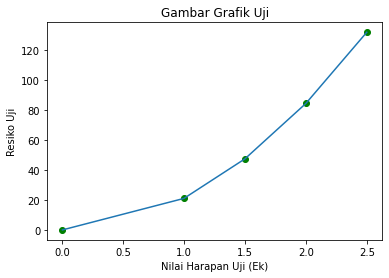

In [274]:
#Memvisualisasikan Total nilai Harapan dan Nilai Resiko (Uji)
x_uji = np.array([Ek1,Ek2,Ek3,Ek4,Ek5])
y_uji = np.array([resiko1,resiko2,resiko3,resiko4,resiko5])
plt.plot(x_uji,y_uji)
plt.scatter(x_uji, y_uji, c='green');
plt.title("Gambar Grafik Uji")
plt.xlabel("Nilai Harapan Uji (Ek)")
plt.ylabel("Resiko Uji")

Penggabungan Data Awal (2017) dengan Data Pengujian (2019) 

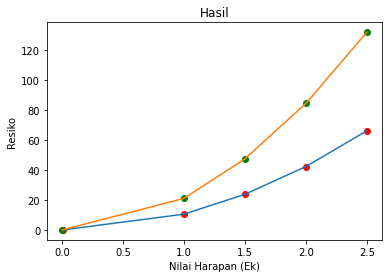

In [278]:
plt.plot(x, y)
plt.plot(x_uji, y_uji)
plt.scatter(x, y, color='red')
plt.scatter(x_uji, y_uji, color='green')
plt.title("Hasil")
plt.xlabel("Nilai Harapan (Ek)")
plt.ylabel("Resiko")
plt.show()